In [141]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px


ModuleNotFoundError: No module named 'plotly'

# Load the data files and explore the data


In [ ]:
# Load the data file with all the parameter combinations

params = np.load("Lesson_18_Project_2_visual_stimulus_parameters.npz")
print(params)
#print(list(params.items())) #npz is a dictionary like object --> can list the items
#print(params["spatial_frequency_by_degree"])
#print(params["direction_in_degrees"])
#print(params["temporal_frequency_in_Hz"])
#print(len(params["direction_in_degrees"])) #can see that there are 360 values, are in order of appearance for the visual responses



vis_resp = np.load("Lesson_18_Project_2_visual_responses.npy")
print(vis_resp)
print(vis_resp.shape)
print(np.max(vis_resp))

NpzFile 'Lesson_18_Project_2_visual_stimulus_parameters.npz' with keys: spatial_frequency_by_degree, direction_in_degrees, temporal_frequency_in_Hz
[[0.60760736 0.07289141 0.21872561 ... 0.06108151 0.08787686 0.01221359]
 [0.29306504 0.16858025 0.20312798 ... 0.01969437 0.54640877 0.00467603]
 [0.89037305 1.89485407 0.61752272 ... 0.42740291 0.28210169 0.02379151]
 ...
 [0.14699568 0.10410866 0.18706043 ... 0.04867572 0.16665453 0.0357335 ]
 [0.1423216  0.21810155 0.19015963 ... 0.03248261 0.09024631 0.13528691]
 [0.44439757 0.26155955 0.33229989 ... 0.14194696 0.28772622 0.03972746]]
(384, 360)
4.473522663116455


In [ ]:
#Make arrays of the params
spat_freq = params["spatial_frequency_by_degree"]
dir_degr = params["direction_in_degrees"]
temp_freq = params["temporal_frequency_in_Hz"]

print(spat_freq)

[0.16 0.08 0.08 0.08 0.08 0.04 0.16 0.04 0.04 0.16 0.08 0.16 0.04 0.16
 0.08 0.04 0.16 0.04 0.08 0.04 0.16 0.04 0.08 0.08 0.04 0.08 0.08 0.16
 0.16 0.16 0.08 0.16 0.04 0.16 0.04 0.16 0.08 0.04 0.04 0.16 0.04 0.16
 0.08 0.08 0.04 0.08 0.08 0.16 0.04 0.04 0.16 0.16 0.08 0.16 0.16 0.08
 0.04 0.08 0.04 0.16 0.08 0.04 0.16 0.08 0.16 0.04 0.16 0.08 0.04 0.04
 0.04 0.08 0.04 0.08 0.08 0.08 0.08 0.04 0.04 0.04 0.16 0.08 0.08 0.08
 0.16 0.04 0.08 0.04 0.04 0.04 0.16 0.16 0.08 0.08 0.08 0.04 0.08 0.16
 0.08 0.16 0.04 0.16 0.08 0.08 0.16 0.08 0.16 0.08 0.08 0.08 0.16 0.04
 0.16 0.16 0.04 0.08 0.16 0.16 0.04 0.04 0.16 0.16 0.08 0.04 0.04 0.16
 0.16 0.08 0.16 0.16 0.08 0.04 0.04 0.04 0.08 0.16 0.04 0.04 0.16 0.16
 0.16 0.04 0.04 0.04 0.16 0.04 0.08 0.08 0.16 0.16 0.08 0.16 0.04 0.16
 0.08 0.08 0.04 0.08 0.16 0.16 0.04 0.04 0.08 0.08 0.16 0.08 0.04 0.16
 0.04 0.04 0.16 0.16 0.04 0.08 0.04 0.08 0.04 0.16 0.08 0.16 0.04 0.08
 0.16 0.16 0.16 0.08 0.16 0.16 0.08 0.16 0.04 0.08 0.08 0.04 0.08 0.16
 0.04 

# Task 1: get the direction tuning of each neuron at the 3 different spatial frequencies
- calculate the avg response of each neuron for each combination of direction and spatial frequency
- this should result in a 384 x 12 matrix per spatial frequency
- sort the directions in ascending order

## Own notes:
directions: 
- 0 (=360), 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330
- spatial frequencies: 0.04, 0.08, 0.16

In [ ]:
#Step 1: order the columns in the dictionary from low to high direction (easier for Step 2)
#print(type(params))
df_nonsort = pd.DataFrame({"direction_in_degrees": dir_degr, "spatial_frequency_by_degree" : spat_freq, "temporal_frequency_in_Hz": temp_freq}) #Make df because easier to work with
#print(df_nonsort)

df = df_nonsort.sort_values(by = ["direction_in_degrees"]) #sort the df by dir in degr
print(df)


     direction_in_degrees  spatial_frequency_by_degree  \
201                     0                         0.16   
173                     0                         0.08   
53                      0                         0.16   
24                      0                         0.04   
25                      0                         0.08   
..                    ...                          ...   
233                   330                         0.04   
91                    330                         0.16   
86                    330                         0.08   
176                   330                         0.04   
235                   330                         0.08   

     temporal_frequency_in_Hz  
201                         4  
173                         4  
53                          4  
24                          4  
25                          1  
..                        ...  
233                         1  
91                          1  
86             

In [ ]:
#Step 2: Get indices of the spatial freq that are equal to low (0.04), medium (0.08), or high (0.16) frequency

low = df.loc[df["spatial_frequency_by_degree"] == 0.04]
med = df.loc[df["spatial_frequency_by_degree"] == 0.08]
high = df.loc[df["spatial_frequency_by_degree"] == 0.16]
print(high[0:12])

low_ind = low.index
med_ind = med.index
high_ind = high.index
print(low_ind)

     direction_in_degrees  spatial_frequency_by_degree  \
201                     0                         0.16   
53                      0                         0.16   
311                     0                         0.16   
177                     0                         0.16   
80                      0                         0.16   
226                     0                         0.16   
346                     0                         0.16   
20                      0                         0.16   
246                     0                         0.16   
110                     0                         0.16   
320                    30                         0.16   
302                    30                         0.16   

     temporal_frequency_in_Hz  
201                         4  
53                          4  
311                         1  
177                         1  
80                          4  
226                         4  
346                  

In [ ]:
#Step 3: use obtained indices to get visual responses in order

vis_resp_low = vis_resp[:,low_ind]
print(vis_resp_low)

vis_resp_med = vis_resp[:, med_ind]
print(vis_resp_med)

vis_resp_high = vis_resp[:, high_ind]
print(vis_resp_high)


[[0.05308925 0.01673477 0.20733896 ... 0.0260368  0.29994088 0.0579385 ]
 [0.         0.17125957 0.05526142 ... 0.46858904 0.06303131 0.12225233]
 [0.04822233 0.22079109 0.21474363 ... 0.15792687 0.09477651 0.1141974 ]
 ...
 [0.16309792 0.10330999 0.2263626  ... 0.06936715 0.09347349 0.10714781]
 [0.0919093  0.29522735 0.10489467 ... 0.19338289 0.06080641 0.14865251]
 [0.30404982 0.53520375 0.3262029  ... 0.09661499 0.05416526 0.13372773]]
[[0.10877651 0.11521538 0.03391951 ... 0.06423966 0.07228637 0.50554931]
 [0.05467841 0.20085418 0.28916517 ... 0.13743183 0.26320145 0.03628622]
 [1.26425159 0.07583865 1.04942024 ... 0.05902976 0.24821858 0.07663229]
 ...
 [0.17337617 0.05085255 0.19461891 ... 0.12462571 0.25193885 0.1511367 ]
 [0.11946232 0.14677551 0.20552075 ... 0.06641899 0.09423441 0.14928527]
 [0.68433005 0.17960341 0.45084012 ... 0.1325047  0.29132175 0.14716171]]
[[0.02541897 0.46056101 0.64732611 ... 0.04277452 0.1503485  0.05916663]
 [0.0916649  0.16858938 0.29884121 ... 

In [ ]:
#Double check correct values and matrix sizes
print(vis_resp_low[:,0])
print(vis_resp[:, 24])

print(vis_resp_high.shape)
print(type(vis_resp_high))

[5.30892462e-02 0.00000000e+00 4.82223257e-02 4.09445703e-01
 8.20042714e-02 7.75923505e-02 1.82822555e-01 3.07714313e-01
 5.94742713e-04 4.20654565e-02 7.93766379e-02 1.13119595e-01
 3.42108831e-02 8.62867832e-02 4.74088602e-02 9.62957740e-02
 1.10534333e-01 1.66501805e-01 7.37640858e-02 1.27546772e-01
 7.38311782e-02 3.94086093e-02 1.37346119e-01 2.23110560e-02
 5.80292754e-02 6.08657114e-02 2.47257426e-01 1.98760524e-01
 1.16041410e+00 9.80379730e-02 1.02123022e-01 4.17529866e-02
 2.51481473e-01 8.45711589e-01 2.07098320e-01 1.14496648e-02
 1.60631448e-01 5.47904857e-02 1.03053756e-01 1.45468563e-01
 5.20926677e-02 3.94122070e-03 2.29365438e-01 2.57206947e-01
 5.24856858e-02 4.84676659e-01 1.23313770e-01 6.31014526e-01
 5.92125989e-02 1.30881965e-01 7.64301494e-02 6.11594226e-03
 1.18466742e-01 1.76762938e+00 5.57234325e-02 1.98669638e-02
 6.66027069e-02 5.71881086e-02 4.27032448e-02 3.63587253e-02
 1.23834275e-01 2.18778383e-02 1.16873300e-02 1.02980040e-01
 2.20001772e-01 7.426691

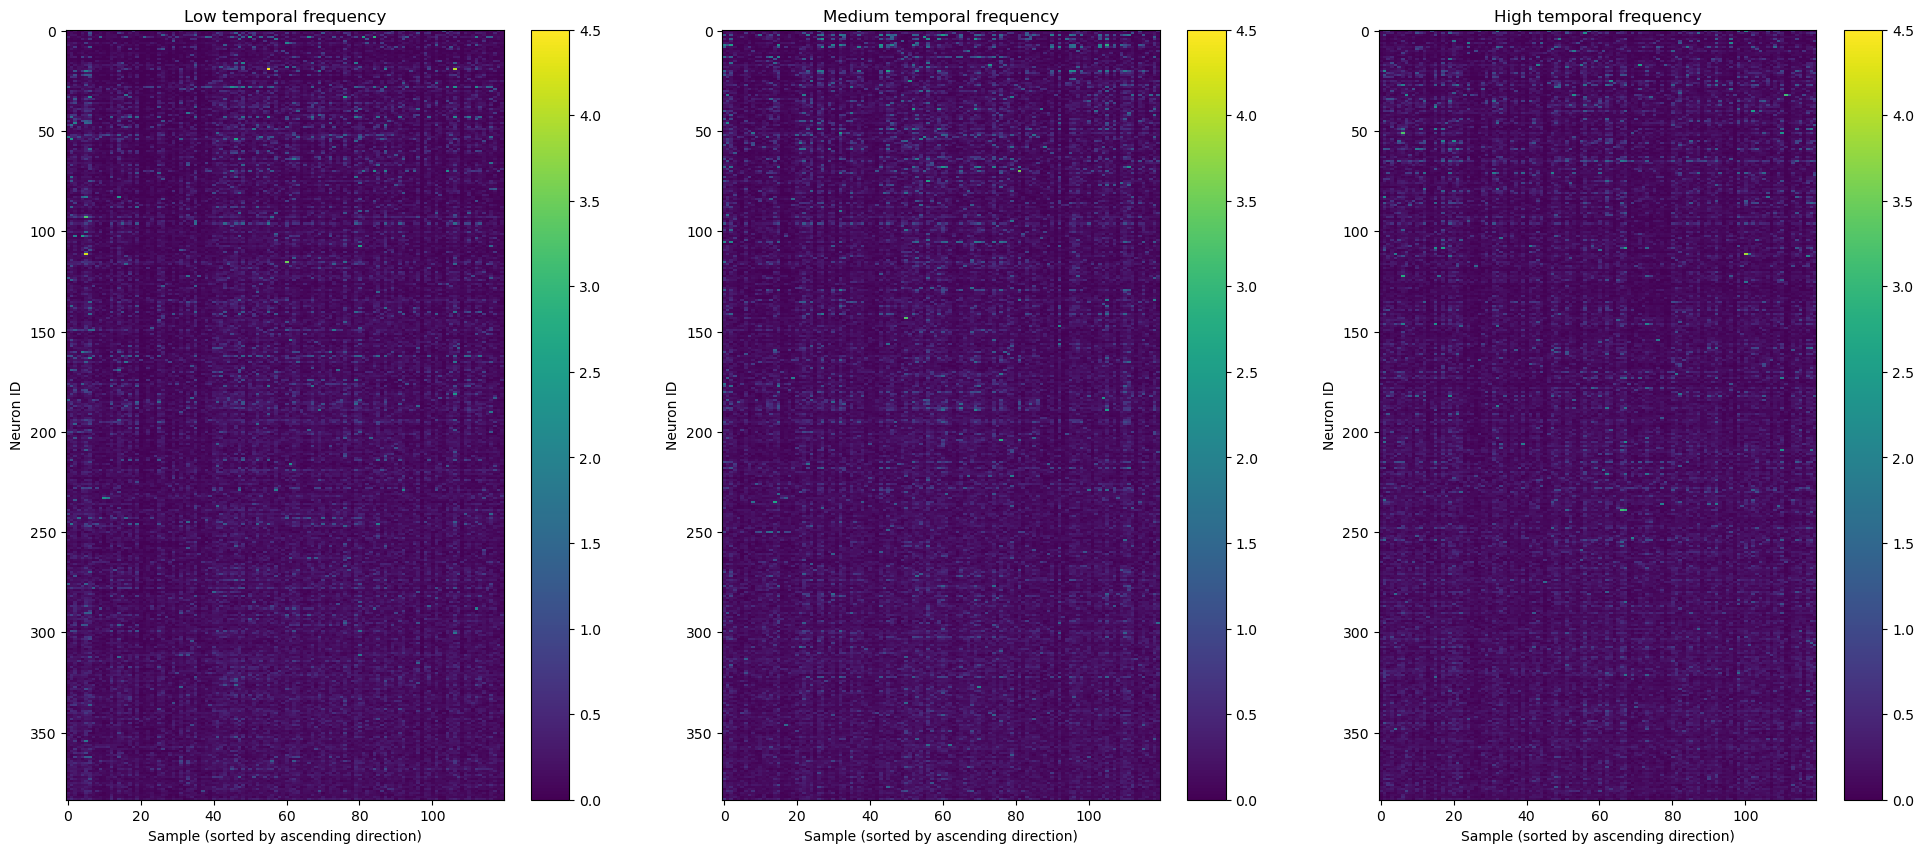

In [ ]:
#Plot heatmap of the response of each neuron to a certain direction and certain repeat, for each of the freqs, as a first visual control

#low freq
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24, 10))

im_L = ax[0].imshow(vis_resp_low, vmin=0, vmax=4.5, aspect = "auto", interpolation='none')  #Max value in whole response dataset was 4.47 see much above --> use this as max, and to be able to compare across figures. This max does seem to be a bit of an outlier though (see avg plots)
ax[0].set(title="Low temporal frequency", ylabel="Neuron ID", xlabel="Sample (sorted by ascending direction)")
fig.colorbar(im_L)

im_M = ax[1].imshow(vis_resp_med, vmin=0, vmax=4.5, aspect = "auto", interpolation='none')
ax[1].set(title="Medium temporal frequency", ylabel="Neuron ID", xlabel="Sample (sorted by ascending direction)")
fig.colorbar(im_M)


im_H = ax[2].imshow(vis_resp_high, vmin=0, vmax=4.5, aspect = "auto", interpolation='none')
ax[2].set(title="High temporal frequency", ylabel="Neuron ID", xlabel="Sample (sorted by ascending direction)")
fig.colorbar(im_H)


In [144]:
#Step 4: average every 10 values

## for loop, position 0 needs to get avg of vals 0-10 (exclusive stop), pos 1 avg of 10-20 etc --> pos x avg of 10x - 10(x+1) (5 repeats per param comb but here we're still pooling the temporal freq data!)
## This gives 120/10 = 12 

#print(vis_resp_high.shape[1])

#Low freq
vr_low_avg = np.zeros((vis_resp_low.shape[0], int(vis_resp_low.shape[1]/10))) #Initialize an np array of size #neurons x #spatial directions (see also above)

for row in range(vis_resp_low.shape[0]):    #Loop over the number of neurons

    for pos in range(int(vis_resp_low.shape[1]/10)):    #Loop over the recordings, taking into account that we have repeats so they need to be reduced (see above)
        vr_low_avg[row, pos] =  np.mean(vis_resp_low[row, (10*pos) : (10*(pos+1))]) # see above

print(vr_low_avg)
print(vr_low_avg.shape)

#Repeat for med and high freq
#Med freq
vr_med_avg = np.zeros((vis_resp_med.shape[0], int(vis_resp_med.shape[1]/10)))

for row in range(vis_resp_med.shape[0]):

    for pos in range(int(vis_resp_med.shape[1]/10)):
        vr_med_avg[row, pos] =  np.mean(vis_resp_med[row, (10*pos) : (10*(pos+1))])

print(vr_med_avg)
print(vr_med_avg.shape)

#High freq
vr_high_avg = np.zeros((vis_resp_high.shape[0], int(vis_resp_high.shape[1]/10)))

for row in range(vis_resp_high.shape[0]):

    for pos in range(int(vis_resp_high.shape[1]/10)):
        vr_high_avg[row, pos] =  np.mean(vis_resp_high[row, (10*pos) : (10*(pos+1))])

print(vr_high_avg)
print(vr_high_avg.shape)

print(np.max(vr_high_avg))

[[0.10429756 0.09847079 0.02577458 ... 0.10514973 0.19241782 0.06575717]
 [0.20106628 0.20334917 0.11781342 ... 0.29328649 0.21514652 0.18186498]
 [0.17526475 0.09463864 0.27376377 ... 0.162816   0.1751078  0.10373674]
 ...
 [0.10810866 0.11160055 0.10582224 ... 0.15572471 0.12226467 0.11158209]
 [0.1406392  0.12488372 0.09097914 ... 0.11022603 0.0862275  0.12918728]
 [0.31042498 0.26838802 0.18689148 ... 0.18092832 0.25147219 0.21862928]]
(384, 12)
[[0.04368237 0.05204565 0.18604633 ... 0.15127718 0.08556133 0.22641724]
 [0.161826   0.13520152 0.30593355 ... 0.18903077 0.107407   0.22679201]
 [0.32365517 0.47277344 0.57365639 ... 0.85960358 0.53645163 0.49865375]
 ...
 [0.14937884 0.0847526  0.13463926 ... 0.13035613 0.16252488 0.19371388]
 [0.1240359  0.07982248 0.14893548 ... 0.17079024 0.14881206 0.1361231 ]
 [0.2422573  0.2480368  0.24786123 ... 0.26804024 0.2542241  0.24525946]]
(384, 12)
[[0.16850772 0.25502143 0.17386064 ... 0.33750087 0.51269638 0.12973385]
 [0.19007089 0.4783

[  0  30  60  90 120 150 180 210 240 270 300 330]


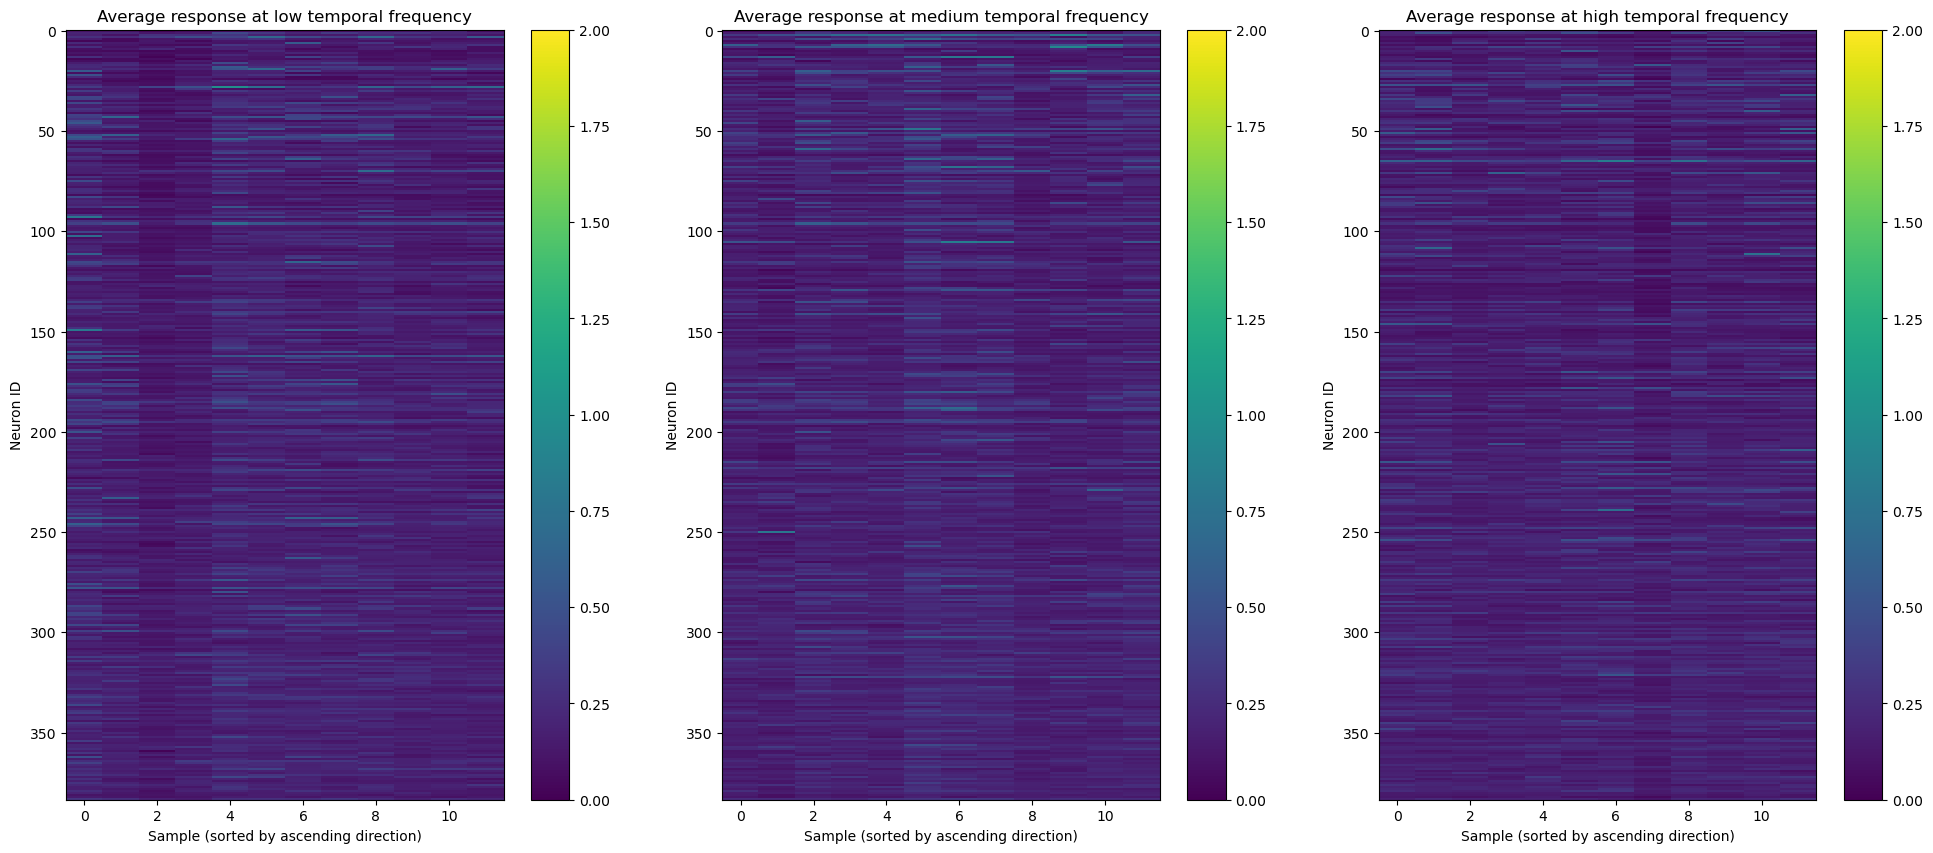

In [ ]:
#Again plot figures for quality check

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24, 10))
#dir_deg = df["direction_in_degrees"].unique()
#print(dir_deg)

im_avgL = ax[0].imshow(vr_low_avg, vmin=0, vmax=2, aspect = "auto", interpolation='none')  #Max value in whole response dataset was 4.47 see much above --> use this as max, and to be able to compare across figures
ax[0].set(title="Average response at low temporal frequency", ylabel="Neuron ID", xlabel="Sample (sorted by ascending direction)")
#ax[0].set_xlabel(dir_deg)
fig.colorbar(im_avgL)

im_avgM = ax[1].imshow(vr_med_avg, vmin=0, vmax=2, aspect = "auto", interpolation='none')
ax[1].set(title="Average response at medium temporal frequency", ylabel="Neuron ID", xlabel="Sample (sorted by ascending direction)")
fig.colorbar(im_avgM)


im_avgH = ax[2].imshow(vr_high_avg, vmin=0, vmax=2, aspect = "auto", interpolation='none')
ax[2].set(title="Average response at high temporal frequency", ylabel="Neuron ID", xlabel="Sample (sorted by ascending direction)")
fig.colorbar(im_avgH)

# Task 2: Get the preferred motion direction of each neuron and the strength of directional tuning

Use formulas provided   

In [ ]:
#Step 1: explore direction selectivity for neuron 1 via radar chart

df = pd.DataFrame(dict(
    r=[1, 5, 2, 2, 3],
    theta=['processing cost','mechanical properties','chemical stability',
           'thermal stability', 'device integration']))
fig = px.line_polar(vr_low_avg[0,:], r='r', theta='theta', line_close=True)
fig.show()

In [ ]:
unique_dir_in_deg = df["direction_in_degrees"].unique()
print(unique_dir_in_deg)

vr_low_avg[2,3] * np.exp(1j * unique_dir_in_deg[0] / 180 * np.pi)/ np.pi * 180
print(int(vr_low_avg.shape[1]))

[  0  30  60  90 120 150 180 210 240 270 300 330]
12


[0.10429756 0.09847079 0.02577458 0.0630238  0.06805006 0.07377152
 0.04542954 0.07724627 0.11509149 0.10514973 0.19241782 0.06575717]
[  0  30  60  90 120 150 180 210 240 270 300 330]


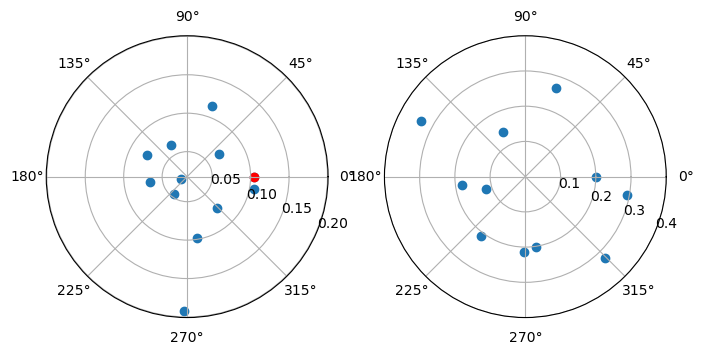

In [ ]:
# Plot direction responses in radar plot (see https://matplotlib.org/stable/gallery/pie_and_polar_charts/polar_demo.html#) to get idea of what the preferred direction should be
#For neuron 1 and 2
r1 = vr_low_avg[0,:]
r2 = vr_low_avg[1,:]
theta = df["direction_in_degrees"].unique()

print(r)
print(theta)

fig, axs = plt.subplots(1, 2, figsize=(8, 5),subplot_kw={'projection': 'polar'})
ax = axs[0]
ax.scatter(theta, r1)
ax.set_rmax(0.2)
ax.set_rticks([0.05, 0.1, 0.15, 0.2])  # Fewer radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)
ax.scatter(theta[0], r1[0], c="red")

ax = axs[1]
ax.scatter(theta, r2)
ax.set_rmax(0.4)
ax.set_rticks([0.1, 0.2, 0.3, 0.4])  # Fewer radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

plt.show()

In [ ]:
#Step 1: Preferred direction and DSI
# Provided formula: np.angle (np.sum (average_direction_response_of_neuron * np.exp(1j*unique_directions_in_deg/180*np.pi))) /np.pi * 180
# np.angle: returns the angle of the complex argument
# np.sum: makes vector sum of the avg responses to each direction, converted to polar coordinates via the exp
    ##Sum calculates over array, so no need for looping over the different directions manually

# 1j * the directions (in degrees): 
    ## 1j is imaginary number i
    ## unique directions in deg: [0, 30, 60 etc]
# np.angle gives the radians, so need to convert back to degrees via multiplying with 180/pi

#DSI = np.abs (np.sum (average_direction_response_of_neuron * np.exp(1j*unique_directions_in_deg/180*np.pi))) / np.sum(average_direction_response_of_neuron)
# Is the absolute value of the vector sum, and then divided by the total avg direction response

unique_dir_in_deg = df["direction_in_degrees"].unique()
print(unique_dir_in_deg)

dir_rad = unique_dir_in_deg / 180 * np.pi #I converted this already to radians for easier syntax later
print(dir_rad)

pref_dir = np.zeros((int(vr_low_avg.shape[0]),1))   #Prepare np array of zeros to fill
dsi = np.zeros((int(vr_low_avg.shape[0]),1))

for neur in range(int(vr_low_avg.shape[0])):
    pref_dir[neur] = np.angle(np.sum(vr_low_avg[neur,:] * np.exp(1j * dir_rad)))/ np.pi * 180
    dsi[neur] = np.abs((np.sum (vr_low_avg[neur] * np.exp(1j*dir_rad))) / np.sum(vr_low_avg[neur])) #Calculate the dsi

print(pref_dir)
print(pref_dir.shape)
print(dsi)


# repeat for med
pref_dir_med = np.zeros((int(vr_med_avg.shape[0]),1))   #Prepare np array of zeros to fill
dsi_med = np.zeros((int(vr_med_avg.shape[0]),1))

for neur in range(int(vr_med_avg.shape[0])):
    pref_dir_med[neur] = np.angle(np.sum(vr_med_avg[neur,:] * np.exp(1j * dir_rad)))/ np.pi * 180
    dsi_med[neur] = np.abs((np.sum (vr_med_avg[neur] * np.exp(1j*dir_rad))) / np.sum(vr_med_avg[neur])) #Calculate the dsi


# repeat for high
pref_dir_high = np.zeros((int(vr_high_avg.shape[0]),1))   #Prepare np array of zeros to fill
dsi_high = np.zeros((int(vr_high_avg.shape[0]),1))

for neur in range(int(vr_high_avg.shape[0])):
    pref_dir_high[neur] = np.angle(np.sum(vr_high_avg[neur,:] * np.exp(1j * dir_rad)))/ np.pi * 180
    dsi_high[neur] = np.abs((np.sum (vr_high_avg[neur] * np.exp(1j*dir_rad))) / np.sum(vr_high_avg[neur])) #Calculate the dsi

print(np.max(dsi))

[  0  30  60  90 120 150 180 210 240 270 300 330]
[0.         0.52359878 1.04719755 1.57079633 2.0943951  2.61799388
 3.14159265 3.66519143 4.1887902  4.71238898 5.23598776 5.75958653]
[[-6.75489340e+01]
 [-1.68012511e+02]
 [ 1.08060856e+02]
 [-1.78610008e+02]
 [ 1.62264427e+02]
 [-1.45355715e+02]
 [-1.53902329e+02]
 [-1.42933943e+02]
 [-8.19653214e+01]
 [ 9.35248699e+01]
 [ 1.75830751e+02]
 [-1.63793872e+02]
 [ 1.32273671e+02]
 [-1.57306993e+02]
 [-1.49897220e+02]
 [-1.55033418e+02]
 [-1.77977029e+02]
 [ 6.09650198e+01]
 [-1.69825195e+02]
 [-1.56716840e+02]
 [-6.29974648e+01]
 [ 1.46348569e+02]
 [-8.23024528e+01]
 [ 3.42402473e+00]
 [ 1.12472952e-01]
 [-1.48469198e+02]
 [-1.53557173e+02]
 [ 3.86967953e+00]
 [ 1.63199327e+02]
 [ 1.03616736e+02]
 [-1.11951376e+02]
 [ 1.62698645e+02]
 [-1.28786984e+02]
 [-1.39148120e+02]
 [-2.25592024e+01]
 [-1.47037009e+02]
 [-1.51465212e+02]
 [-1.57348975e+02]
 [ 1.71318358e+02]
 [-1.12336851e+02]
 [-1.49418913e+02]
 [ 1.15168388e+02]
 [-1.16175008e+02

-1.1789513040266093
[  0  30  60  90 120 150 180 210 240 270 300 330]


c:\Users\u0157175\AppData\Local\anaconda3\envs\Kaat_tryout\Lib\site-packages\matplotlib\collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


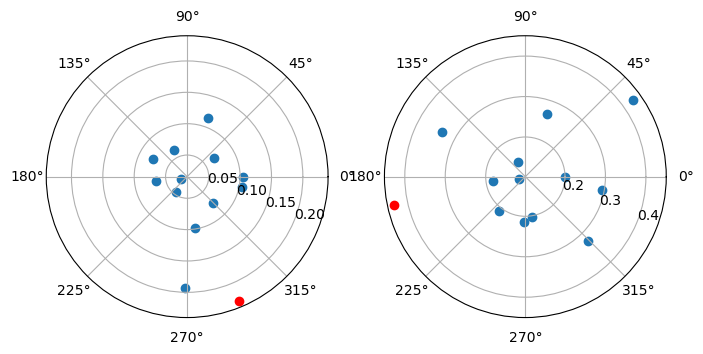

In [164]:
# Quality control: Plot preferred direction on plots for neuron 1 and 2 (first part repeat above code for plot)
# Plot direction responses in radar plot (see https://matplotlib.org/stable/gallery/pie_and_polar_charts/polar_demo.html#) to get idea of what the preferred direction should be
#For neuron 1 and 2
r1 = vr_low_avg[0,:] # Takes all responses of neuron 1, are the lengths of the vector
r2 = vr_low_avg[1,:]
theta = df["direction_in_degrees"].unique()

vecsum_angle1 = np.angle(np.sum(vr_low_avg[0,:] * np.exp(1j * dir_rad))) #
vecsum_len1 = np.sum(vr_low_avg[0,:] * np.exp(1j * dir_rad)) / (np.exp(1j*vecsum_angle1))

vecsum_angle2 = np.angle(np.sum(vr_low_avg[1,:] * np.exp(1j * dir_rad)))
vecsum_len2 = np.sum(vr_low_avg[1,:] * np.exp(1j * dir_rad)) / (np.exp(1j*vecsum_angle2))

print(vecsum_angle1)
print(theta)

fig, axs = plt.subplots(1, 2, figsize=(8, 5),subplot_kw={'projection': 'polar'})
ax = axs[0]
ax.scatter(theta, r1) #plots all the responses of neuron 1 per defined angle theta (the directions in degrees)
ax.set_rmax(0.2)
ax.set_rticks([0.05, 0.1, 0.15, 0.2])  # Fewer radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)
ax.scatter(vecsum_angle1, vecsum_len1, c = 'red') #Plot the vector sum of all the directions on the existing plot, meaning the preferred direction (angle) with its size (len) 


ax = axs[1]
ax.scatter(theta, r2)
ax.set_rmax(0.4)
ax.set_rticks([0.1, 0.2, 0.3, 0.4])  # Fewer radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)
ax.scatter(vecsum_angle2, vecsum_len2, c = 'red')

plt.show()

### Not sure if this makes sense, think about this!!! It does make sense if you roughly follow the dots


# Task 3: plot the distribution of the DSI to see how many neurons show strong directional tuning


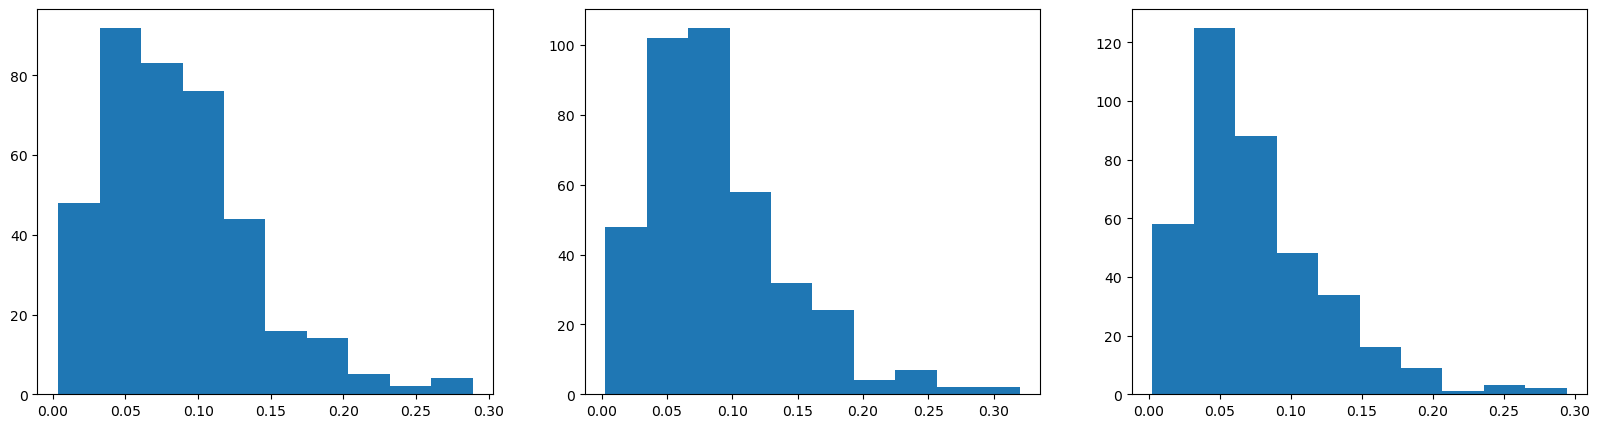

[]
[(32, array([0.31252504])), (128, array([0.32002324]))]
[(32, array([0.31252504])), (128, array([0.32002324]))]


In [ ]:
fig, axs = plt.subplots(1,3, figsize = (20,5))
ax = axs[0]
ax.hist(dsi)

ax = axs[1]
ax.hist(dsi_med)

ax = axs[2]
ax.hist(dsi_high)
plt.show()

#Which neurons have dsi > 0.3 ?
neur_dsi = []
x = 0

# The following code checks whether a dsi is larger than 0.3 and only if so, it appends the index and value to an overal array neur_dsi (comprising all high-med-low)
for ind, val in enumerate(dsi):
    if val > 0.3:
        neur_dsi.append((ind,val))
        x = x + 1
print(neur_dsi)

for ind, val in enumerate(dsi_med):
   if val > 0.3:
        neur_dsi.append((ind,val))
        x = x + 1
print(neur_dsi)

for ind, val in enumerate(dsi_high):
   if val > 0.3:
        neur_dsi.append((ind,val))
        x = x + 1
print(neur_dsi)


-1.1789513040266093
[  0  30  60  90 120 150 180 210 240 270 300 330]


c:\Users\u0157175\AppData\Local\anaconda3\envs\Kaat_tryout\Lib\site-packages\matplotlib\collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


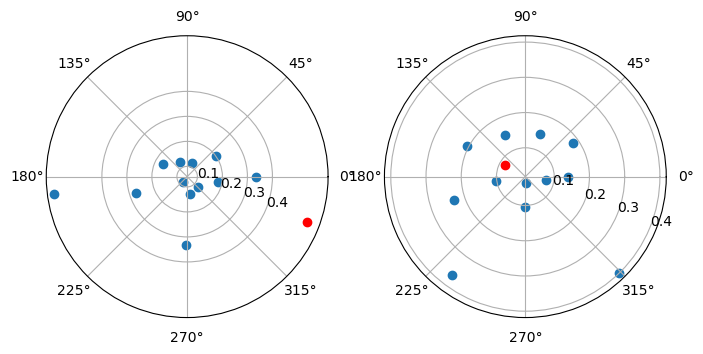

In [166]:
# Plot the distribution of preferred directions
#neur1 = 32
#neur2 = 128
#both these show up only at medium temporal frequency

n1_avgresp = vr_med_avg[32,:] #For plotting all the responses
n2_avgresp = vr_med_avg[128,:] 
theta = df["direction_in_degrees"].unique()

n1_pref_angle = np.angle(np.sum(vr_med_avg[32,:] * np.exp(1j * dir_rad))) #For plotting the preferred angle
n1_pref_len = np.sum(vr_med_avg[32,:] * np.exp(1j * dir_rad)) / (np.exp(1j*vecsum_angle1)) #For plotting the size of the preferred response (vector sum)

n2_pref_angle = np.angle(np.sum(vr_low_avg[128,:] * np.exp(1j * dir_rad)))
n2_pref_len = np.sum(vr_low_avg[128,:] * np.exp(1j * dir_rad)) / (np.exp(1j*vecsum_angle2))

print(vecsum_angle1)
print(theta)

fig, axs = plt.subplots(1, 2, figsize=(8, 5),subplot_kw={'projection': 'polar'})
ax = axs[0]
ax.scatter(theta, n1_avgresp)
ax.set_rmax(0.4)
ax.set_rticks([0.1, 0.2, 0.3, 0.4])  # Fewer radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)
ax.scatter(n1_pref_angle, n1_pref_len, c = 'red') #Plot the vector sum on the existing plot, with 


ax = axs[1]
ax.scatter(theta, n2_avgresp)
ax.set_rmax(0.4)
ax.set_rticks([0.1, 0.2, 0.3, 0.4])  # Fewer radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)
ax.scatter(n2_pref_angle, n2_pref_len, c = 'red')

plt.show()


